## Dados do Titanic

kaggle

In [111]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [112]:
dados = pd.read_csv ('/content/tested.csv')

In [113]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
dados = dados.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis= 1)

In [115]:
dados.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,0,3,male,34.5,0,0,7.8292
1,893,1,3,female,47.0,1,0,7.0000
2,894,0,2,male,62.0,0,0,9.6875
3,895,0,3,male,27.0,0,0,8.6625
4,896,1,3,female,22.0,1,1,12.2875


In [116]:
dados = dados.set_index(['PassengerId']) # passar o ID pela contagem dessa coluna
dados = dados.rename(columns = {'Survived': 'target'}, inplace= False) #renomeando coluna


In [117]:
dados.head()

,target,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
892,0,3,male,34.5,0,0,7.8292
893,1,3,female,47.0,1,0,7.0000
894,0,2,male,62.0,0,0,9.6875
895,0,3,male,27.0,0,0,8.6625
896,1,3,female,22.0,1,1,12.2875


In [118]:
# Descritiva com colunas numéricas
# mean + 0,36 % das que sobreviveram
dados.describe()

,target,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [119]:
dados.describe(include =['O']) # Letra O maiscula

,Sex
count,418
unique,2
top,male
freq,266


In [120]:
# Criando colunas para dados de genero

dados ['Sex_f'] = np.where(dados['Sex'] == 'female', 1, 0)

# Criando novas colunas 1, 2, 3 conforme a coluna Pclasse
dados ['Pcalss_1'] = np.where(dados['Pclass'] == 1, 1, 0)
dados ['Pcalss_2'] = np.where(dados['Pclass'] == 2, 1, 0)
dados ['Pcalss_3'] = np.where(dados['Pclass'] == 3, 1, 0)

In [121]:
dados.head(20)

,target,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_f,Pcalss_1,Pcalss_2,Pcalss_3
PassengerId,,,,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,0,0,0,1
893,1,3,female,47.0,1,0,7.0000,1,0,0,1
894,0,2,male,62.0,0,0,9.6875,0,0,1,0
895,0,3,male,27.0,0,0,8.6625,0,0,0,1
896,1,3,female,22.0,1,1,12.2875,1,0,0,1
897,0,3,male,14.0,0,0,9.2250,0,0,0,1
898,1,3,female,30.0,0,0,7.6292,1,0,0,1
899,0,2,male,26.0,1,1,29.0000,0,0,1,0
900,1,3,female,18.0,0,0,7.2292,1,0,0,1


In [122]:
# Depois de ter criado as colunas posso excluir as originais

dados = dados.drop(['Pclass', 'Sex'], axis = 1)

In [123]:
dados.shape

(418, 9)

In [124]:
dados.head()

,target,Age,SibSp,Parch,Fare,Sex_f,Pcalss_1,Pcalss_2,Pcalss_3
PassengerId,,,,,,,,,
892,0,34.5,0,0,7.8292,0,0,0,1
893,1,47.0,1,0,7.0000,1,0,0,1
894,0,62.0,0,0,9.6875,0,0,1,0
895,0,27.0,0,0,8.6625,0,0,0,1
896,1,22.0,1,1,12.2875,1,0,0,1


In [125]:
dados.dtypes

target        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Sex_f         int64
Pcalss_1      int64
Pcalss_2      int64
Pcalss_3      int64
dtype: object

In [126]:
dados.isnull().sum()

target       0
Age         86
SibSp        0
Parch        0
Fare         1
Sex_f        0
Pcalss_1     0
Pcalss_2     0
Pcalss_3     0
dtype: int64

In [127]:
dados.fillna(0, inplace = True)


In [128]:
# Depois de preencher com zero os dados faltantes
dados.isnull().sum()

target      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_f       0
Pcalss_1    0
Pcalss_2    0
Pcalss_3    0
dtype: int64

In [129]:
# Algoritmo de amostragem
# 70% para treinar o modelo
# 30 % para trestar o modelo

x_train, x_test, y_train, y_test = train_test_split (dados.drop(['target'], axis = 1),
                                                     dados['target'],
                                                     test_size = 0.30,
                                                     random_state = 1234)
[{'treino' : x_train.shape}, {'teste' : x_test.shape} ]



[{'treino': (292, 8)}, {'teste': (126, 8)}]

Modelo

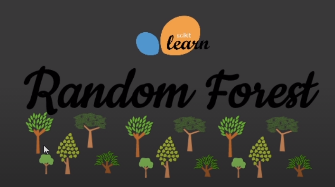

In [130]:
rndforest = RandomForestClassifier(n_estimators = 1000,
                                   criterion = 'gini',
                                   max_depth = 5) # mapeando como será o modelo

rndforest.fit (x_train, y_train) # fazendo o calculo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
probabilidade = rndforest.predict_proba(dados.drop('target', axis = 1))[:,1]
classificacao = rndforest.predict(dados.drop('target', axis = 1)) # retornará que acima de 0,50 será 1, sobrevivencia 

In [132]:
dados['probabilidade'] = probabilidade
dados['classificacao'] = classificacao

In [133]:
dados

,target,Age,SibSp,Parch,Fare,Sex_f,Pcalss_1,Pcalss_2,Pcalss_3,probabilidade,classificacao
PassengerId,,,,,,,,,,,
892,0,34.5,0,0,7.8292,0,0,0,1,0.049656,0
893,1,47.0,1,0,7.0000,1,0,0,1,0.904103,1
894,0,62.0,0,0,9.6875,0,0,1,0,0.058183,0
895,0,27.0,0,0,8.6625,0,0,0,1,0.047998,0
896,1,22.0,1,1,12.2875,1,0,0,1,0.894991,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0.0,0,0,8.0500,0,0,0,1,0.048901,0
1306,1,39.0,0,0,108.9000,1,1,0,0,0.891895,1
1307,0,38.5,0,0,7.2500,0,0,0,1,0.044266,0
